In [146]:
# We want to render results
import json
import matplotlib.pyplot as plt

def plot_video_heatmaps(json_file_path):

	# Open files
	with open(json_file_path, 'r') as file:
		data = json.load(file)

	# Define a colormap for the labels and predictions
	cmap = plt.get_cmap('viridis', 2)  # 2 discrete colors

	for key in data.keys():
		
		# Extract the label data
		labels = data[key]['label']
		pred = data[key]['pred']

		# Plot the 1-dimensional heatmap
		plt.figure(figsize=(15, 3))

		# Plot the labels
		plt.subplot(2, 1, 1)
		plt.imshow([labels], aspect='auto', cmap=cmap, vmin=0, vmax=1)
		plt.colorbar(label='Label', ticks=[0, 1])
		plt.xlabel('Index')
		plt.title(f'1-Dimensional Heatmap of Labels for {key}')
		plt.gca().set_yticks([0])
		plt.gca().set_yticklabels(['Labels'])
		plt.gca().tick_params(axis='y', which='both', length=0)

		# Plot the predictions
		plt.subplot(2, 1, 2)
		plt.imshow([pred], aspect='auto', cmap=cmap, vmin=0, vmax=1)
		plt.colorbar(label='Prediction', ticks=[0, 1])
		plt.xlabel('Index')
		plt.title(f'1-Dimensional Heatmap of Predictions for {key}')
		plt.gca().set_yticks([0])
		plt.gca().set_yticklabels(['Predictions'])
		plt.gca().tick_params(axis='y', which='both', length=0)

		# plt.subplot(3, 1, 3)
		# plt.imshow([pred2], aspect='auto', cmap=cmap)
		# plt.colorbar(label='Prediction', ticks=[0, 1, 2])
		# plt.xlabel('Index')
		# plt.title(f'1-Dimensional Heatmap of Predictions for {key}')
		# plt.gca().set_yticks([0])
		# plt.gca().set_yticklabels(['Predictions'])
		# plt.gca().tick_params(axis='y', which='both', length=0)

		plt.tight_layout()
		plt.show()


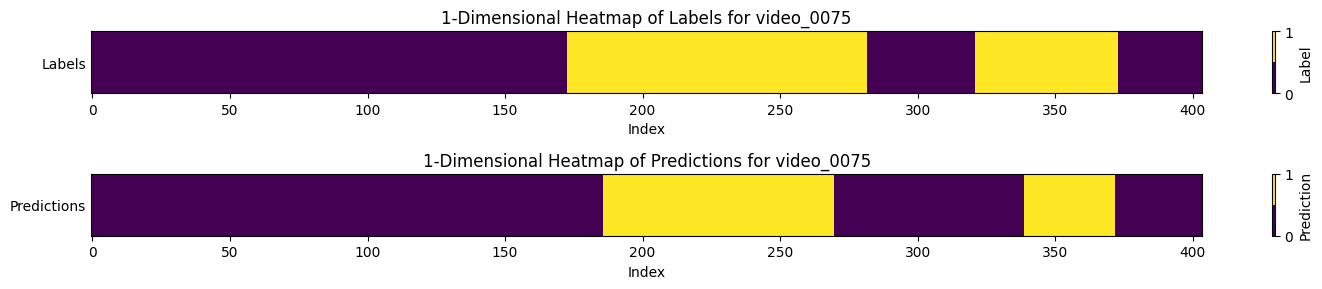

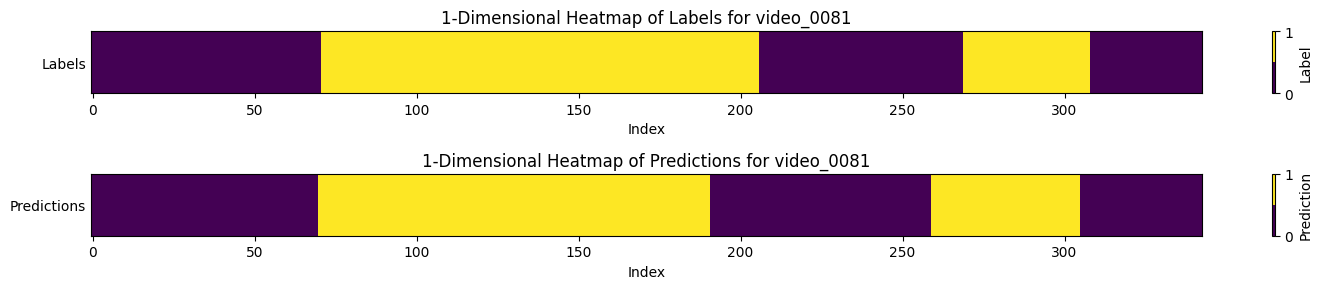

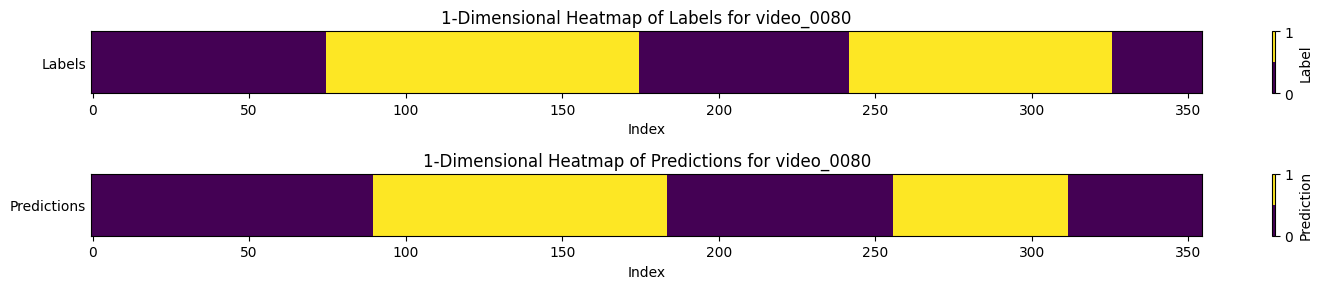

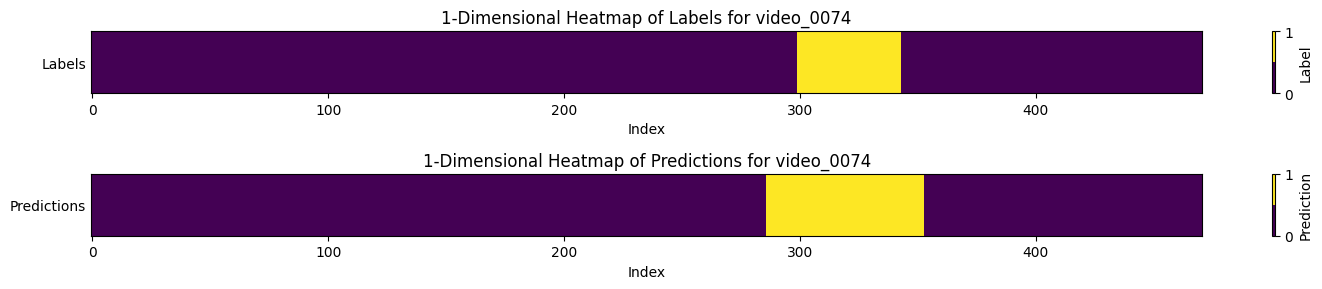

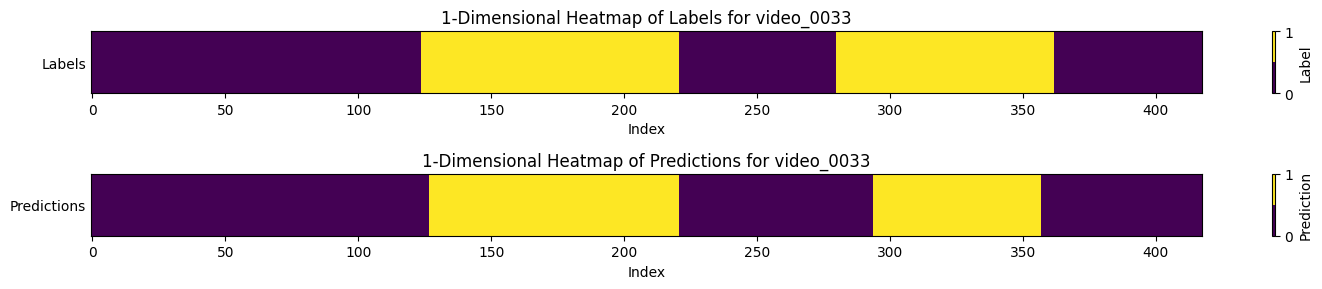

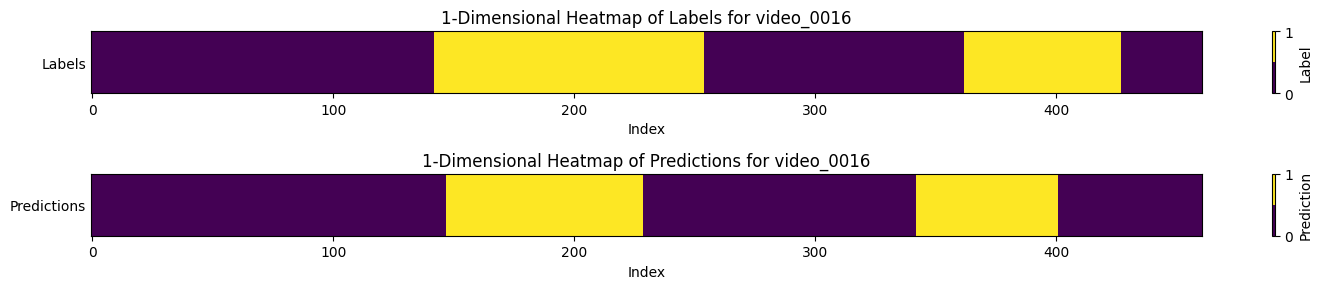

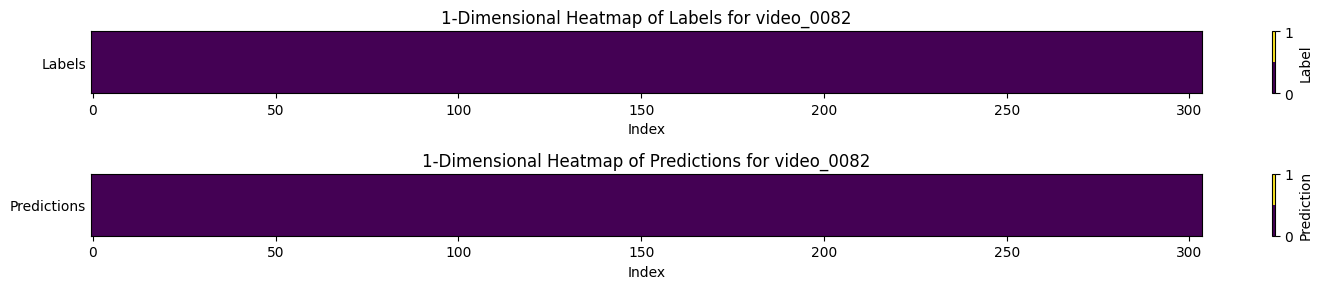

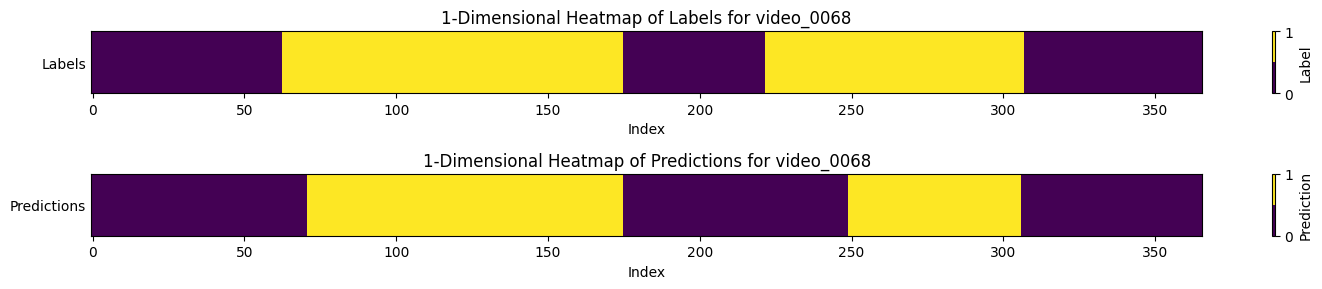

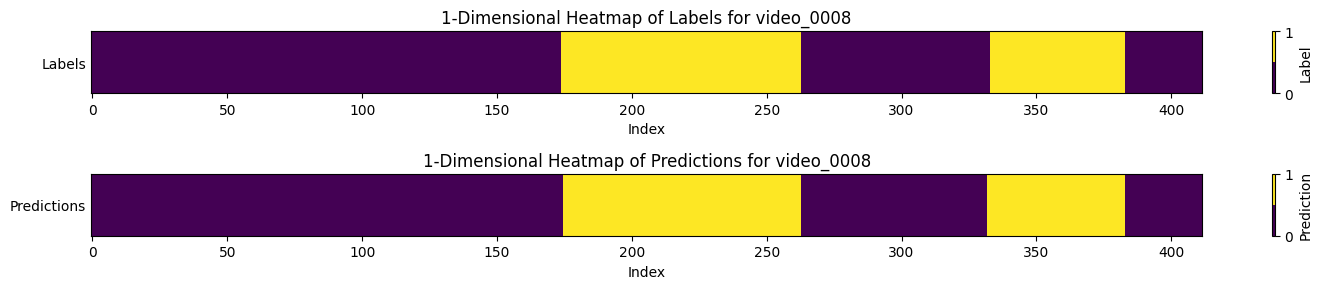

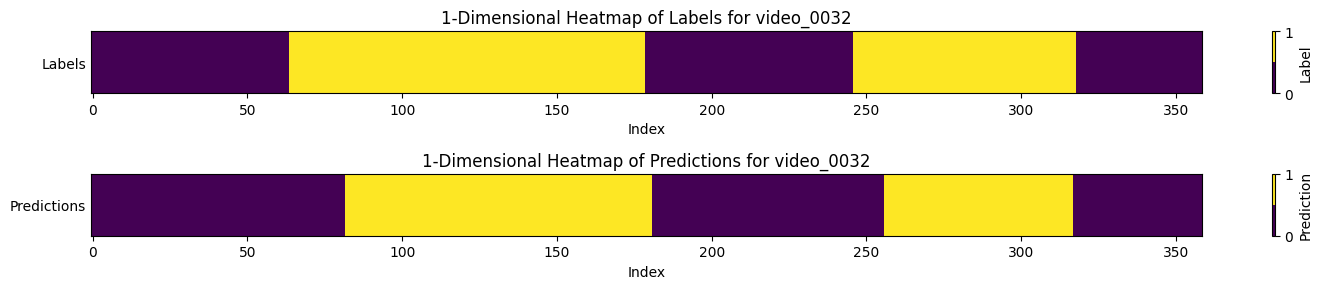

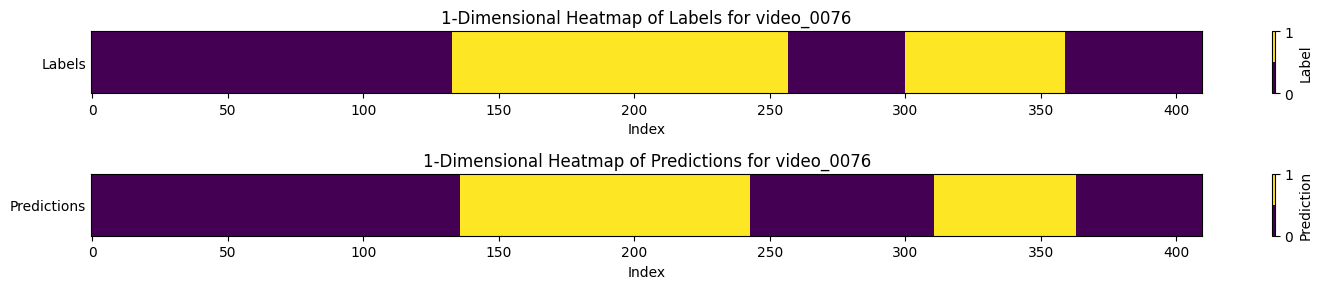

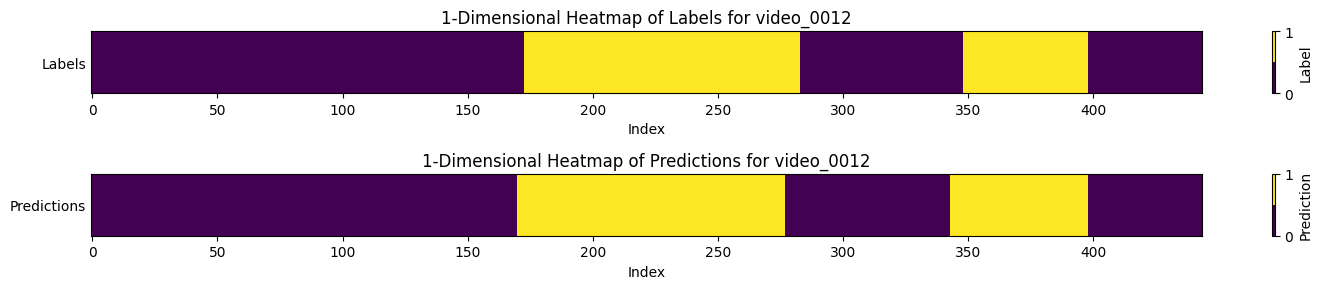

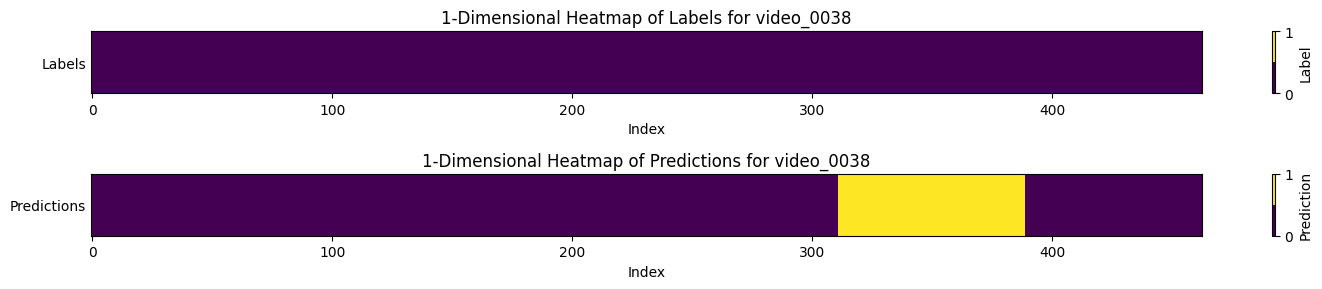

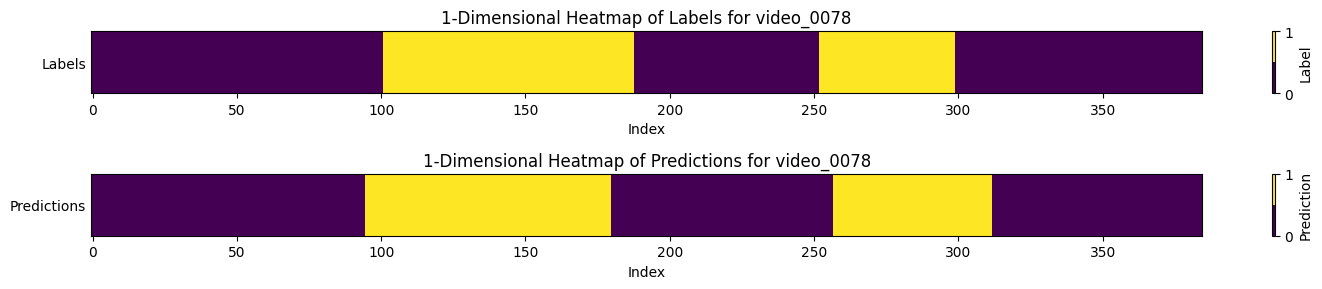

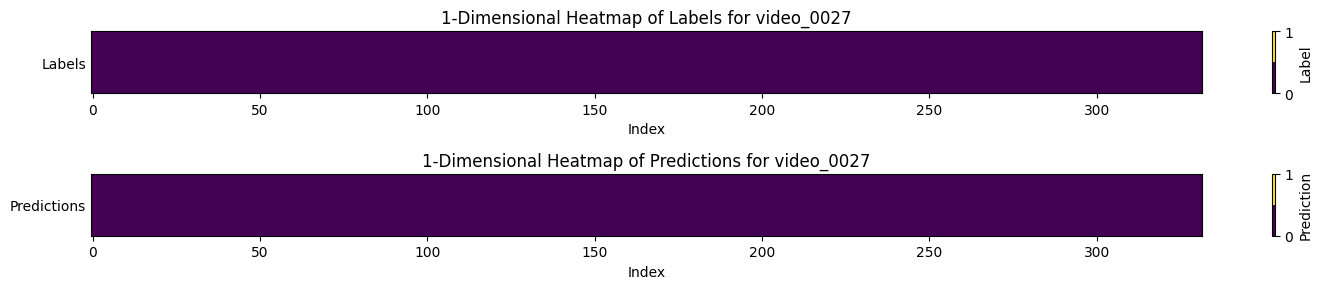

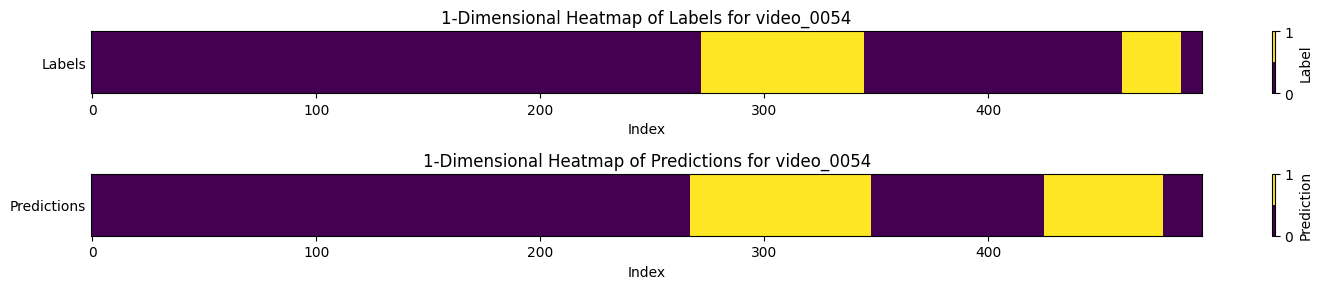

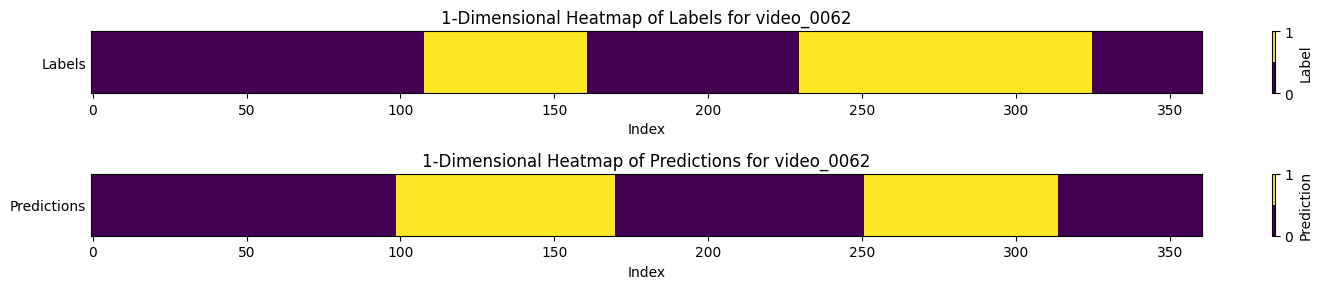

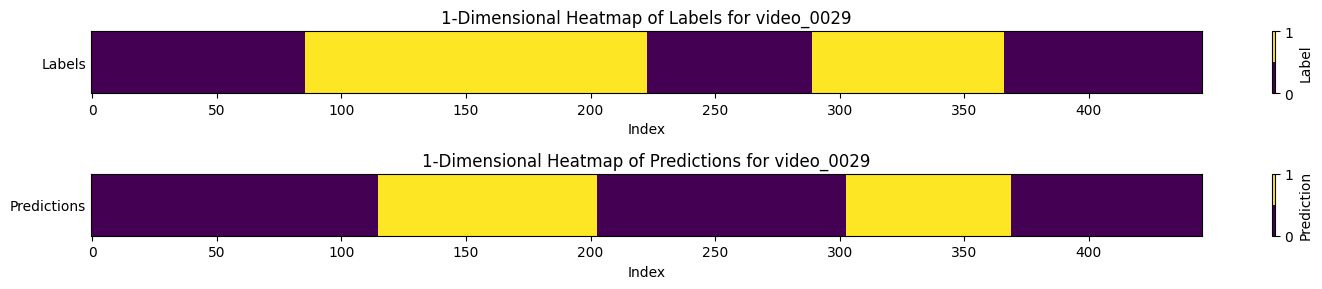

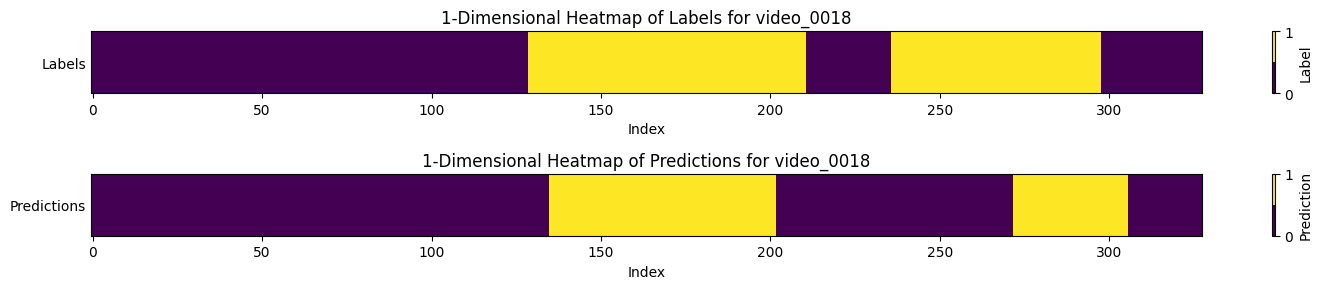

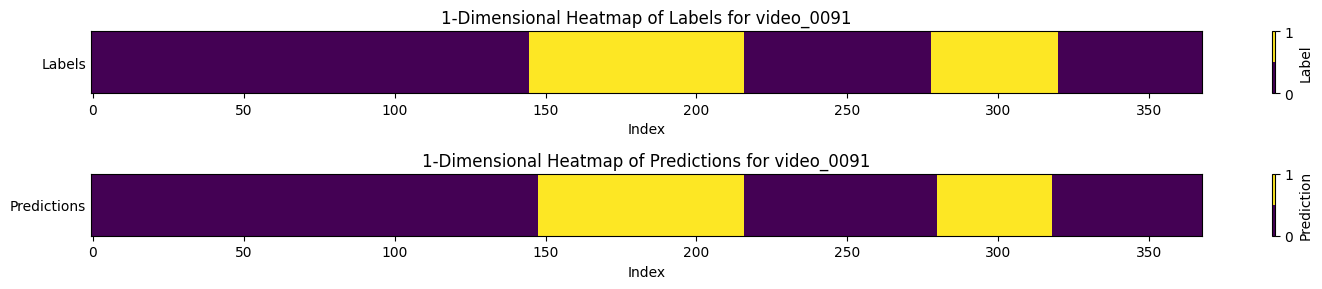

In [147]:
plot_video_heatmaps('../../results/15oct_run6_iter32_test.json')

In [111]:
videos_names = ['video_0008', 'video_0038', 'video_0012', 'video_0054', 'video_0091', 'video_0018']



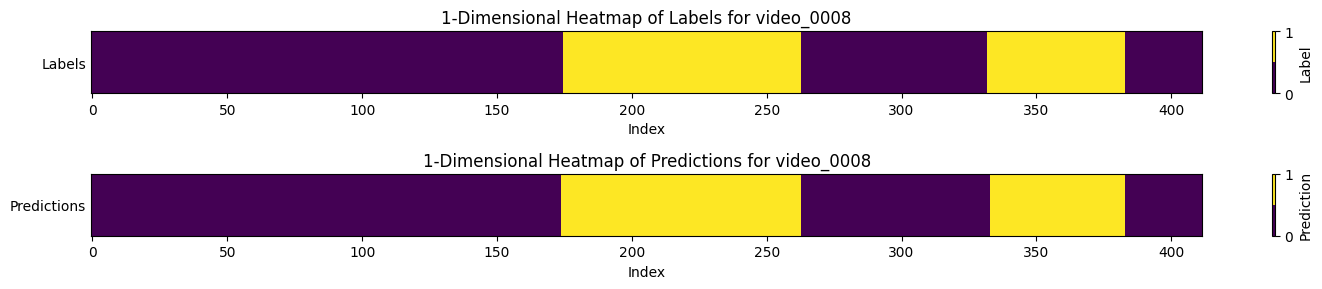

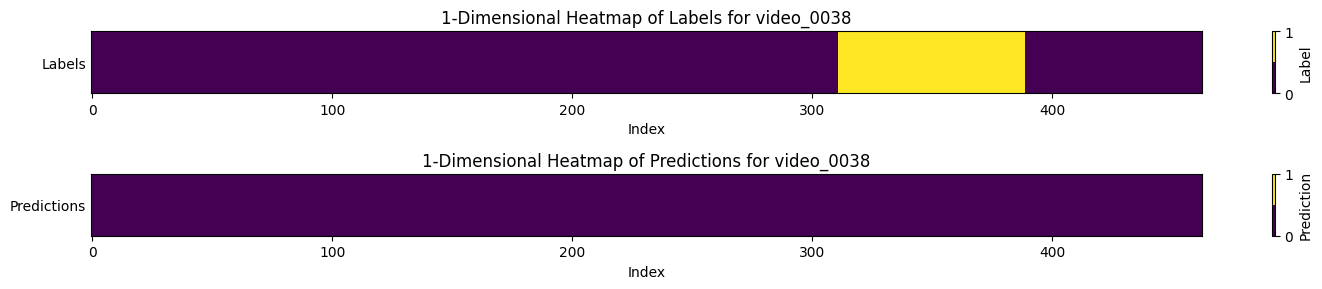

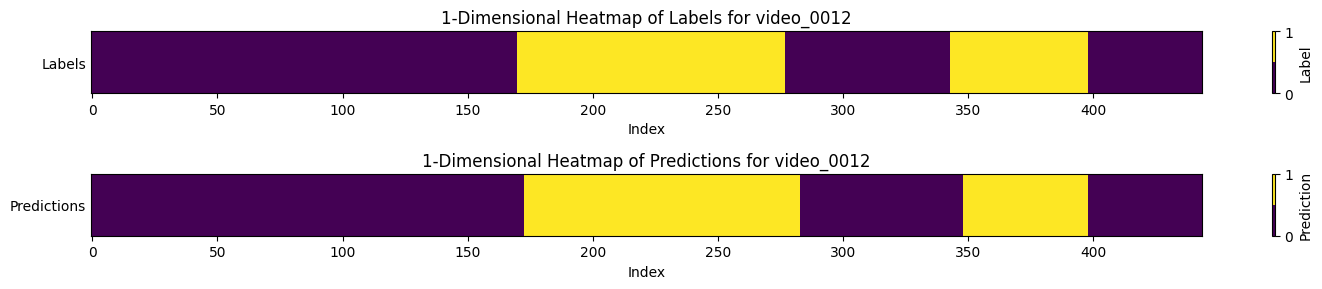

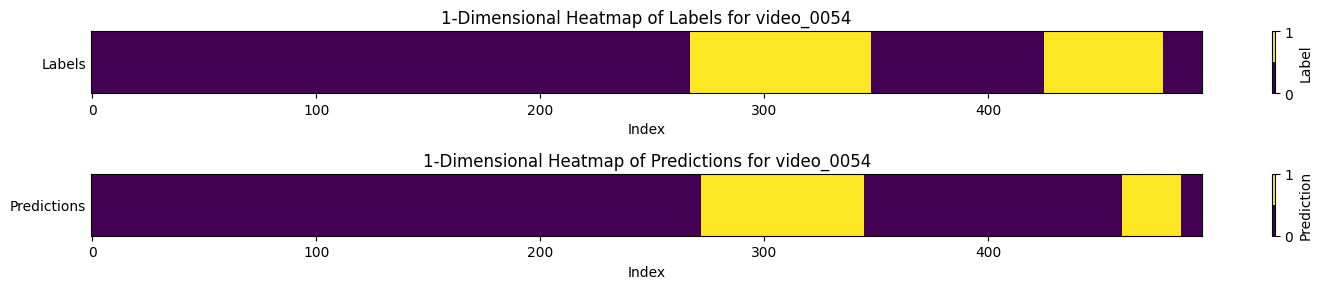

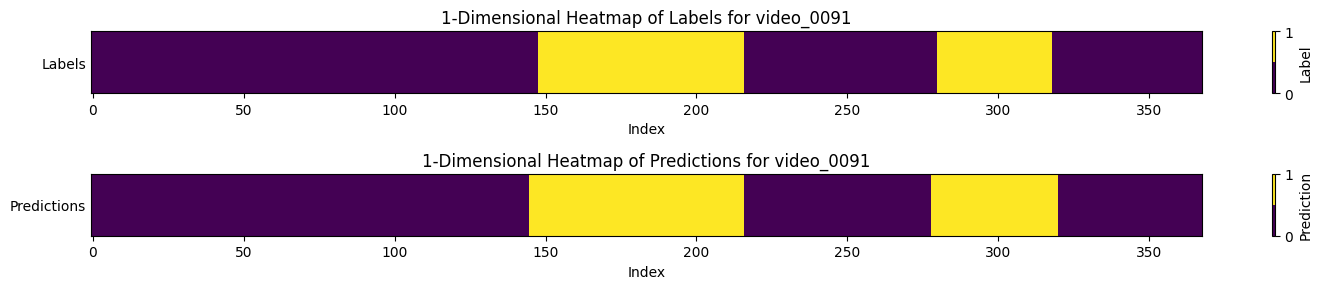

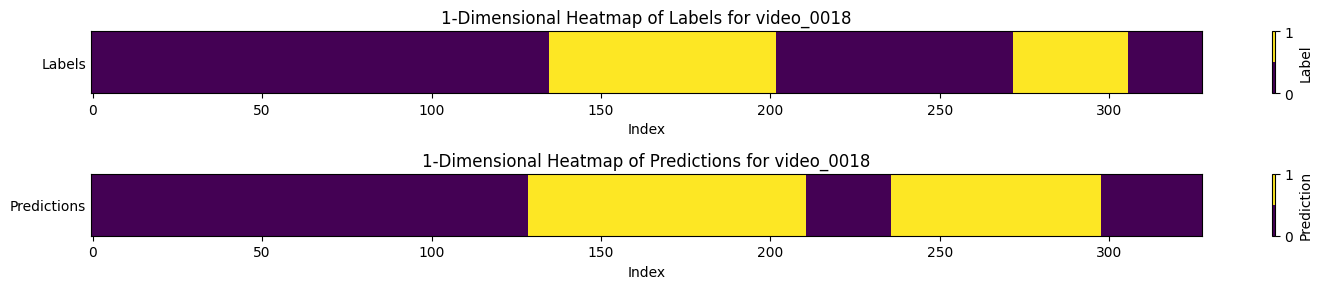

In [116]:

for key in videos_names:

	# Extract the label data
	labels = data[key]['label']
	pred = data[key]['pred']

	# Plot the 1-dimensional heatmap
	plt.figure(figsize=(15, 3))

	# Plot the labels
	plt.subplot(2, 1, 1)
	plt.imshow([labels], aspect='auto', cmap=cmap, vmin=0, vmax=1)
	plt.colorbar(label='Label', ticks=[0, 1])
	plt.xlabel('Index')
	plt.title(f'1-Dimensional Heatmap of Labels for {key}')
	plt.gca().set_yticks([0])
	plt.gca().set_yticklabels(['Labels'])
	plt.gca().tick_params(axis='y', which='both', length=0)

	# Plot the predictions
	plt.subplot(2, 1, 2)
	plt.imshow([pred], aspect='auto', cmap=cmap, vmin=0, vmax=1)
	plt.colorbar(label='Prediction', ticks=[0, 1])
	plt.xlabel('Index')
	plt.title(f'1-Dimensional Heatmap of Predictions for {key}')
	plt.gca().set_yticks([0])
	plt.gca().set_yticklabels(['Predictions'])
	plt.gca().tick_params(axis='y', which='both', length=0)

	plt.tight_layout()
	plt.show()


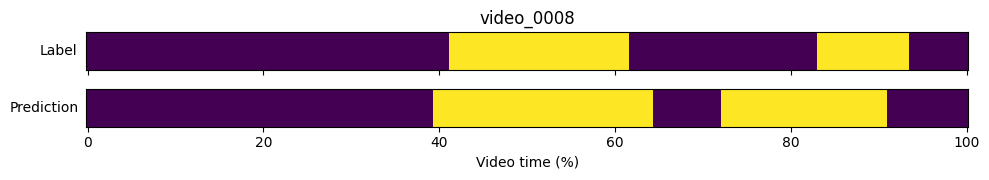

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [117]:
import numpy as np


fig, ax = plt.subplots(2, 1, figsize=(10, 2), sharex=True)

cmap = plt.get_cmap('viridis', 2)
for key in videos_names: 
	# Plot the labels
	ax[0].imshow([labels], aspect='auto', cmap=cmap, vmin=0, vmax=1)
	ax[0].set_title(f'{key}')
	ax[0].set_ylabel('Label', rotation=0, labelpad=20, va='center')
	ax[0].set_yticks([])

	# Plot the predictions
	ax[1].imshow([pred], aspect='auto', cmap=cmap, vmin=0, vmax=1)
	ax[1].set_ylabel('Prediction', rotation=0, labelpad=30, va='center')
	ax[1].tick_params(axis='y', which='both', left=False)
	ax[1].set_yticks([])

	# Set the global x-axis label and title
	ax[1].set_xlabel('Video time (%)')

	ax[1].set_xticks(np.linspace(0, len(pred)-1, num=6))  # 5 intervals (0, 100, 200, 300, 400)
	ax[1].set_xticklabels(np.linspace(0, 100, num=6).astype(int))  # Display as 0, 20, 40, 60, 80, 100

	plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to leave space for the global title
	plt.show()

/var/folders/fq/f72c45gs6y516gssqqdb95340000gp/T/ipykernel_58122/3294042528.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


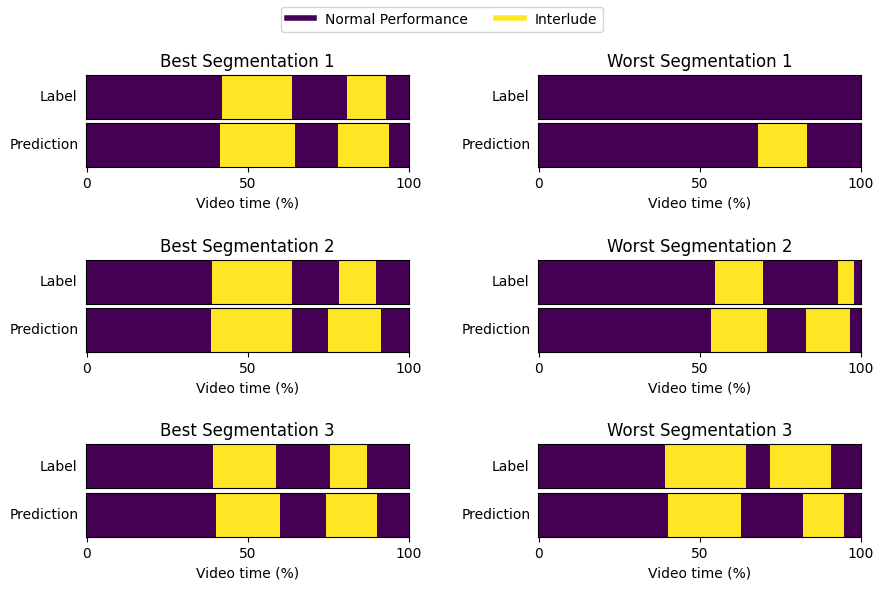

In [150]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Read data
with open('../../results/15oct_run5_iter32_test.json', 'r') as file:
	data = json.load(file)

# Plotting parameters
fig = plt.figure(figsize=(10, 6))
outer = gridspec.GridSpec(3, 2, wspace=0.4, hspace=1)

# Plot
for i in range(6):
	inner = gridspec.GridSpecFromSubplotSpec(2, 1,
					subplot_spec=outer[i], wspace=0.1, hspace=0.1)

	# video id
	key = videos_names[i]
	labels = data[key]['label']
	pred = data[key]['pred']
	if i % 2 == 0:
		title = f"Best Segmentation {i // 2 + 1}"
	else:
		title = f"Worst Segmentation {i // 2 + 1}"

	# Plot the labels
	ax = plt.Subplot(fig, inner[0])
	ax.imshow([labels], aspect='auto', cmap=cmap, vmin=0, vmax=1)
	ax.set_title(f'{title}')
	ax.set_ylabel('Label', rotation=0, labelpad=20, va='center')
	ax.set_xticks([])
	ax.set_yticks([])
	fig.add_subplot(ax)

	# Plot the predictions
	ax = plt.Subplot(fig, inner[1])
	ax.imshow([pred], aspect='auto', cmap=cmap, vmin=0, vmax=1)
	ax.set_ylabel('Prediction', rotation=0, labelpad=30, va='center')
	ax.tick_params(axis='y', which='both', left=False)
	ax.set_yticks([])

	# Set the global x-axis label and title
	ax.set_xlabel('Video time (%)')

	ax.set_xticks(np.linspace(0, len(pred)-1, num=3))  # 5 intervals (0, 100, 200, 300, 400)
	ax.set_xticklabels(np.linspace(0, 100, num=3).astype(int))  # Display as 0, 20, 40, 60, 80, 100
	fig.add_subplot(ax)

# Add a global legend
handles = [plt.Line2D([0], [0], color=cmap(0), lw=4, label='Normal Performance'),
		   plt.Line2D([0], [0], color=cmap(1), lw=4, label='Interlude')]
fig.legend(handles=handles, loc='upper center', ncol=2)

fig.show()

In [154]:
(data['video_0038']['pred'])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
